# (19) df: beta

**Motivation**: Device = ```cuda:3``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from analysis.eval import sparse_score
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Device

In [2]:
device_idx = 3
device = f'cuda:{device_idx}'

from analysis.final import sort_fits, analyze_fits

## Load, make df

### Fit names

In [3]:
fits, fits_st, fits_etc = sort_fits()
len(fits), len(fits_st), len(fits_etc)

(460, 90, 527)

### df

In [4]:
def accept_fn(name):
    archi = name.split('-')[1]
    accept = (
        archi in ['<lin|lin>', '<conv+b|lin>']
        and 'poisson-' in name
        and '-DOVES-' in name
        and '-mc' in name
    )
    return accept


fits = sorted(filter(accept_fn, fits))
fits_etc = sorted(filter(accept_fn, fits_etc))
print(f"# fits: {len(fits)}  ———  # fits_etc: {len(fits_etc)}")

# fits: 10  ———  # fits_etc: 257

In [5]:
%%time

kws = dict(device=device, analysis_mode='main')
df = pd.concat([
    analyze_fits(fits, **kws),
    analyze_fits(fits_etc, **kws),
]).reset_index(drop=True)

save_obj(
    obj=df,
    file_name='df_beta_main',
    save_dir=tmp_dir,
    verbose=True,
    mode='df',
)

100%|█████████████████████████████████████████| 257/257 [04:09<00:00,  1.03it/s]


[PROGRESS] 'df_beta_main.df' saved at
/home/hadi/Dropbox/git/jb-vae/tmp

CPU times: user 2h 28s, sys: 5min 14s, total: 2h 5min 42s
Wall time: 4min 20s


In [6]:
for sparse_key in ['lifetime', 'population']:
    kws = dict(device=device, analysis_mode='sparse', sparse_key=sparse_key)
    df = pd.concat([
        analyze_fits(fits, **kws),
        analyze_fits(fits_etc, **kws),
    ]).reset_index(drop=True)

    save_obj(
        obj=df,
        file_name=f'df_beta_{sparse_key}',
        save_dir=tmp_dir,
        verbose=True,
        mode='df',
    )

100%|█████████████████████████████████████████| 257/257 [04:10<00:00,  1.03it/s]


[PROGRESS] 'df_beta_lifetime.df' saved at
/home/hadi/Dropbox/git/jb-vae/tmp

100%|█████████████████████████████████████████| 257/257 [04:03<00:00,  1.05it/s]


[PROGRESS] 'df_beta_population.df' saved at
/home/hadi/Dropbox/git/jb-vae/tmp

## Load for analysis

In [7]:
df_beta_lifetime = pjoin(tmp_dir, 'df_beta_lifetime.df')
df_beta_lifetime = pd.read_pickle(df_beta_lifetime)

In [8]:
df_beta_lifetime.pivot_table(
    values='lifetime',
    index=['enc_type', 'n_dims'],
    columns='kl_beta',
)

kl_beta              0.01      0.20      0.40      0.60      0.80      1.00  \
enc_type n_dims                                                               
conv     256     0.785190  0.726892  0.690557  0.748952  0.805566  0.859972   
         512     0.825756  0.830178  0.858477  0.887429  0.917139  0.940106   
         768     0.882989  0.889076  0.903477  0.924402  0.945634  0.965025   
         1024    0.913484  0.913079       NaN  0.943433  0.963159  0.976238   
lin      256     0.196153  0.281411  0.350253  0.425329  0.524789  0.618064   
         512     0.325244  0.402350  0.501718  0.607724  0.708325  0.789729   
         768     0.351835  0.462454  0.587347  0.707155  0.804133  0.866527   
         1024    0.377108  0.518036  0.658073  0.776556  0.854867  0.903692   

kl_beta              1.50      4.00  
enc_type n_dims                      
conv     256     0.938684  0.985852  
         512     0.977117  0.996216  
         768     0.986357  0.997168  
         1024    0.990945  0.997571  
lin      256     0.810321  0.994704  
         512     0.912205  0.997055  
         768     0.946355  0.997980  
         1024    0.961817  0.998448

In [9]:
df_beta_lifetime.loc[df_beta_lifetime['enc_type'] == 'lin'].pivot_table(
    values='lifetime',
    index='n_dims',
    columns='kl_beta',
)

kl_beta,0.01,0.20,0.40,0.60,0.80,1.00,1.50,4.00
n_dims,,,,,,,,
256,0.196153,0.281411,0.350253,0.425329,0.524789,0.618064,0.810321,0.994704
512,0.325244,0.402350,0.501718,0.607724,0.708325,0.789729,0.912205,0.997055
768,0.351835,0.462454,0.587347,0.707155,0.804133,0.866527,0.946355,0.997980
1024,0.377108,0.518036,0.658073,0.776556,0.854867,0.903692,0.961817,0.998448


In [10]:
df_beta_main = pjoin(tmp_dir, 'df_beta_main.df')
df_beta_main = pd.read_pickle(df_beta_main)

In [11]:
df_beta_main['type'].unique()

array(['poisson', 'poisson-b0.01', 'poisson-b0.2', 'poisson-b0.6',
       'poisson-b0.8', 'poisson-b1.5', 'poisson-b4', 'poisson-b0.4'],
      dtype=object)

In [12]:
df_beta_main.loc[df_beta_main['enc_type'] == 'lin'].pivot_table(
    values='mse',
    index='n_dims',
    columns='kl_beta',
)

kl_beta,0.01,0.20,0.40,0.60,0.80,1.00,1.50,4.00
n_dims,,,,,,,,
256,32.371941,80.661789,102.298035,117.382179,129.069595,138.432663,155.627960,204.020096
512,20.653063,71.500572,96.992294,114.615738,127.541428,137.700592,156.997391,236.527420
768,19.502605,70.601654,96.431641,114.415306,127.764420,138.747116,162.695404,264.141632
1024,18.903994,70.262360,96.450806,115.025452,129.388641,141.612671,170.452454,300.626617


In [13]:
df_beta_main.loc[df_beta_main['enc_type'] == 'lin'].pivot_table(
    values='mse_map',
    index='n_dims',
    columns='kl_beta',
)

kl_beta,0.01,0.20,0.40,0.60,0.80,1.00,1.50,4.00
n_dims,,,,,,,,
256,12.404500,40.030331,59.375755,76.013794,90.877457,103.699547,129.631470,200.942001
512,3.349867,28.733240,52.290550,72.162308,88.549637,102.393349,130.957245,234.519684
768,2.989707,28.182999,51.895180,72.080978,88.696243,103.381424,139.252243,259.996918
1024,2.802538,28.066967,52.024586,72.792336,90.872459,107.540855,155.143234,293.428070


In [14]:
df_beta_main.loc[df_beta_main['enc_type'] == 'lin'].pivot_table(
    values='active',
    index='n_dims',
    columns='kl_beta',
)

kl_beta,0.01,0.20,0.40,0.60,0.80,1.00,1.50,4.00
n_dims,,,,,,,,
256,0.975000,0.989062,0.992188,0.992188,0.982031,0.978906,0.980469,0.710156
512,0.999219,0.992969,0.985938,0.985156,0.981641,0.983984,0.996094,0.522266
768,0.999740,0.992188,0.988021,0.988802,0.999479,0.923958,0.813021,0.430729
1024,0.999805,0.999023,0.999609,0.998828,0.998047,0.851367,0.994727,0.391016


In [15]:
name = 'poisson-<lin|lin>-DOVES-mc-k1024-b4_mach-1_(2024_05_18,21:11)'
root = add_home('Dropbox/chkpts/PoissonVAE')

tr, meta = load_quick(
    pjoin(add_home(root), name),
    device=device,
    verbose=False,
    lite=True,
)
loss = tr.validate()[1]

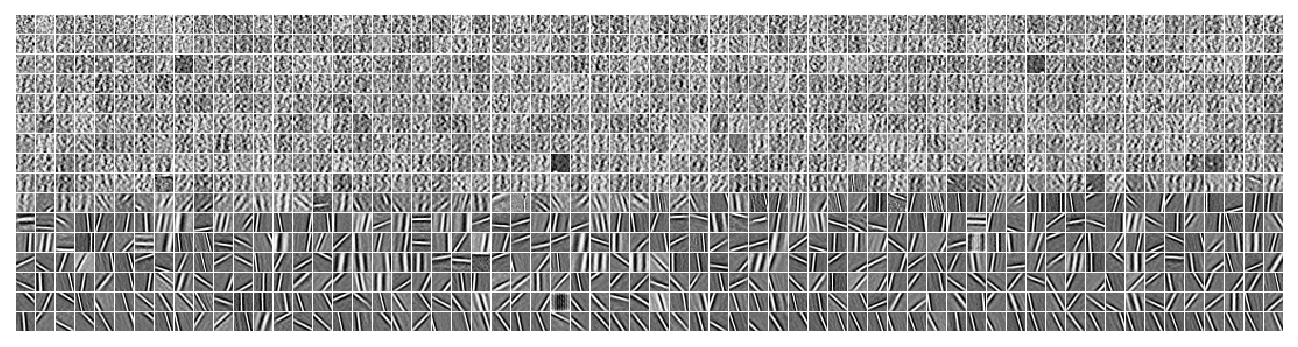

625

In [16]:
tr.model.show(order=np.argsort(loss['kl_diag']))
dead = tr.find_dead_neurons()
dead.sum()

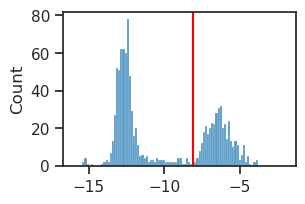

In [17]:
sns.histplot(np.log(loss['kl_diag']), bins=np.linspace(-16, -2, 101))
plt.axvline(np.log(3e-4), color='r');

In [18]:
name = 'poisson-<conv+b|lin>-DOVES-mc-k1024-b1.5_solo-1_(2024_05_19,00:29)'
root = add_home('Dropbox/chkpts/PoissonVAE')

tr, meta = load_quick(
    pjoin(add_home(root), name),
    device=device,
    verbose=False,
    lite=True,
)
loss = tr.validate()[1]

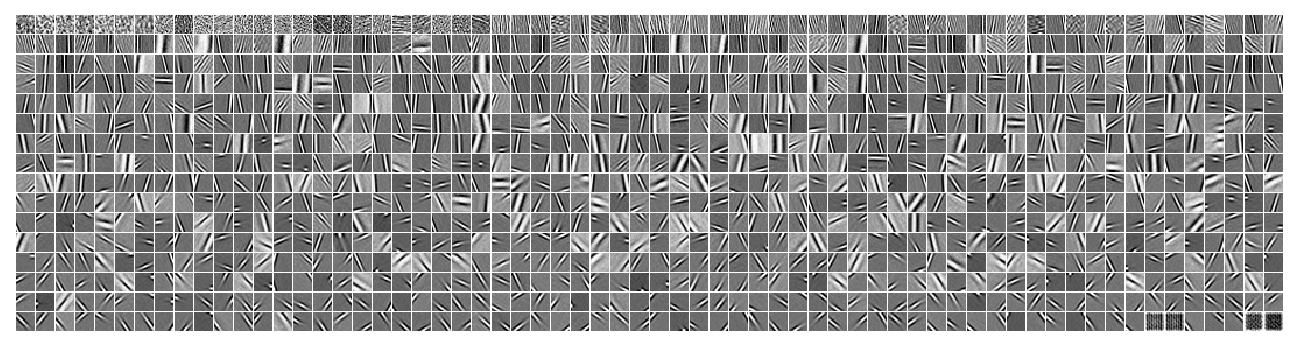

23

In [19]:
tr.model.show(order=np.argsort(loss['kl_diag']))
dead = tr.find_dead_neurons()
dead.sum()

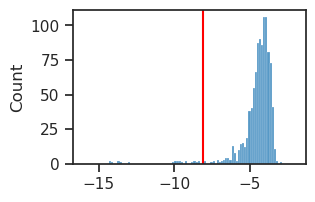

In [20]:
sns.histplot(np.log(loss['kl_diag']), bins=np.linspace(-16, -2, 101))
plt.axvline(np.log(3e-4), color='r');

In [21]:
# mse
df_selec_main = df_beta_main.loc[
    (df_beta_main['n_dims'] == 512) & 
    (df_beta_main['enc_type'] == 'lin')
]
# lifetime
df_selec_lifetime = df_beta_lifetime.loc[
    (df_beta_lifetime['n_dims'] == 512) & 
    (df_beta_lifetime['enc_type'] == 'lin')
]
df_selec_lifetime = df_selec_lifetime.groupby(
    ['kl_beta', 'seed']).mean(numeric_only=True)
df_selec_lifetime = df_selec_lifetime['lifetime'].reset_index()

df_selec_main.shape, df_selec_lifetime.shape

((40, 17), (40, 3))

In [22]:
looper = itertools.product(
    sorted(df_selec_main['kl_beta'].unique()),
    sorted(df_selec_main['seed'].unique()),
)
df2p = collections.defaultdict(list)
for b, s in looper:
    mse_map = df_selec_main.loc[
        (df_selec_main['seed'] == s) &
        (df_selec_main['kl_beta'] == b),
        'mse_map',
    ].item()
    lifetime = df_selec_lifetime.loc[
        (df_selec_lifetime['seed'] == s) &
        (df_selec_lifetime['kl_beta'] == b),
        'lifetime',
    ].item()
    
    vals = {
        'type': 'poisson',
        'type+b': 'poisson' if b == 1.0
        else f"poisson-{b:0.2g}",
        'seed': s,
        'beta': b,
        'mse_map': mse_map,
        'lifetime': lifetime,
    }
    for k, v in vals.items():
        df2p[k].append(v)

df2p = pd.DataFrame(df2p)

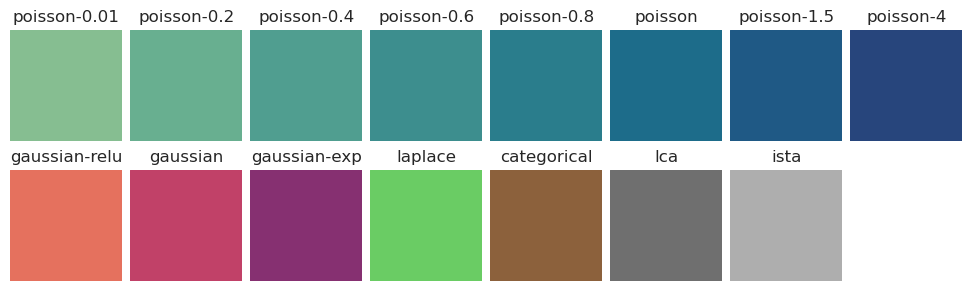

In [23]:
pal = get_palette()
show_palette(pal)

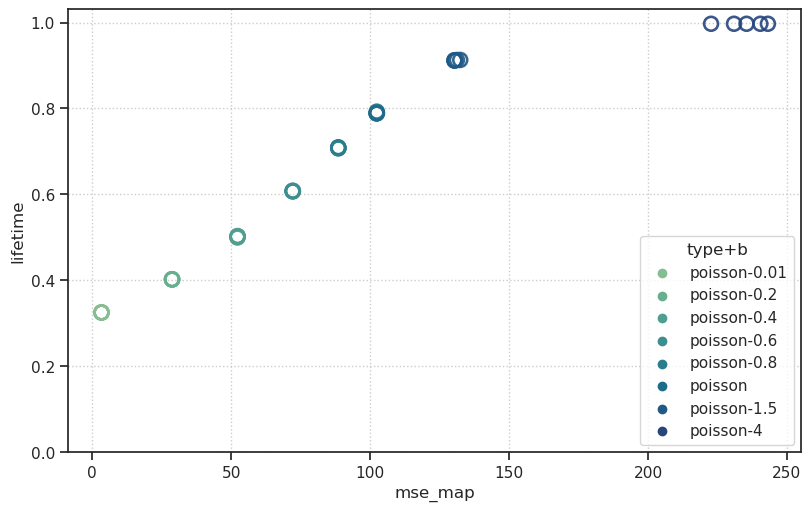

In [25]:
fig, ax = create_figure(figsize=(8, 5))
sns.scatterplot(
    data=df2p,
    x='mse_map',
    y='lifetime',
    hue='type+b',
    palette=pal,
    alpha=0.9,
    s=100,
    ax=ax,
)
for artist in ax.collections:
    c = artist.get_facecolor()
    artist.set_edgecolor(c)
    artist.set_facecolor('none')
    artist.set_lw(1.9)
ax.set_ylim(bottom=0)
sns.move_legend(ax, loc='lower right')
ax.grid()
plt.show()

In [25]:
save_obj(
    obj=df2p,
    file_name='df2p_poisson_lin_beta',
    save_dir=tmp_dir,
    mode='df',
)

[PROGRESS] 'df2p_poisson_lin_beta.df' saved at
/home/hadi/Dropbox/git/jb-vae/tmp